In [2]:
# make tab.
import os 
from os import listdir
import math

import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read training data dic && check file train_data file exist with label
# 讀取官方指定類別，並判斷其訓練資料是否有不存在的類別
label_list = ['isnull']
print(os.getcwd())
train_data_dic_path = os.getcwd()+'/training data dic.txt'
if not os.path.isfile(train_data_dic_path):
    print(' >> training data dic.txt not exist !')
else:
    
    # open dic txt
    txt_file = open(train_data_dic_path, 'r', encoding='utf-8')
    dic_list = txt_file.readlines() # print(dic_list[:10])  ex:'宋\n', '名\n', '楊\n', '活\n'... 可以看到有\n 斷行符號
  
    for label in dic_list:
        label_list.append(label[0])
    txt_file.close()
if len(label_list) > 0:
    print(' >> 官方指定label數量 :' ,len(label_list)) # 800 + 1(isnull)

# get image file info. ex: file_name = 12345_中.jpg
# 取得圖片訊息 ex: file_name = 12345_中.jpg
record_not_exist_list = []
train_data_folder = os.getcwd() + '/ImageDataset/training_set'
if not os.path.isdir(train_data_folder):
    print('training data folder not EXIST!')
else:
    list_train_data = os.listdir(train_data_folder)
    print('>> train data total count :', len(list_train_data))
    for data in list_train_data:
        file_name = data.split('.')[0]
        file_label = file_name.split('_')[1]
    
    if file_label not in label_list:
        record_not_exist_list.append(file_name)
# check file with not exist label
# 檢查紀錄是否存在指定類別外的資料
if len(record_not_exist_list) > 0:
    print(' >> this data error for label exist ')
    print(record_not_exist_list)
else:
    print(' >> all train data label exist on training data dic.txt !')

G:\我的雲端硬碟\Colab_Notebooks\competition2021_04-07_release
 >> 官方指定label數量 : 801
>> train data total count : 68804
 >> all train data label exist on training data dic.txt !


In [10]:
# create tab. with image data info. , 
def create_token_list(file_path, token_name='basic_token'):
    print('>> == create_token_list ==')
    token_num = 0
    label_list = ['isnull']
    token_list = [token_num]
    ans_list = ['isnull'] # 
    token_path = os.getcwd() + '/' + str(token_name) + '.csv'
    if os.path.isfile(file_path):
        txt_file = open(file_path, 'r', encoding = 'utf-8')
        dic_list = txt_file.readlines()
        for label in dic_list:
            token_num +=1
            label_list.append(label[0])
            token_list.append(token_num)
            ans_list.append(label[0])
    if os.path.isfile(token_path):
        print('>> token.csv exist !')
    else:
        print('>> create token.csv !')
        # write in csv ['label_name' ,'token_num', 'return_ans']
        dataframe = pd.DataFrame({'label_name' : label_list,
                                'token_num' : token_list,
                                'return_ans' :ans_list})
        # index = False, 不添加第一行(column)號 ; encoding = 'big5', 繁體中文使用
        dataframe.to_csv('basic_token.csv', index=False, encoding='big5')
if __name__ == '__main__':
    dic_txt_path = os.getcwd() + '/training data dic.txt'
    create_token_list(dic_txt_path)
    df = pd.read_csv(os.getcwd()+'/basic_token.csv', encoding='big5')
    print(df)

>> == create_token_list ==
>> token.csv exist !
    label_name  token_num return_ans
0       isnull          0     isnull
1            宋          1          宋
2            名          2          名
3            楊          3          楊
4            活          4          活
..         ...        ...        ...
796          班        796          班
797          集        797          集
798          覽        798          覽
799          買        799          買
800          圖        800          圖

[801 rows x 3 columns]


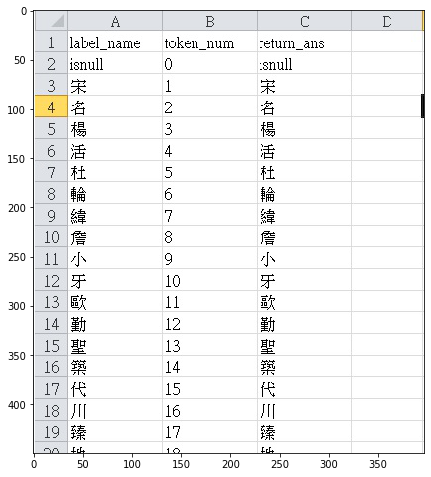

In [60]:
img = Image.open(os.getcwd() +'/image/label_token01.jpg')
plt.figure(figsize=(7,10))
plt.imshow(img)

In [8]:
# create image tab.
# 建立圖片資訊對照表 # 對照表 title = ['img_name', 'img_label', 'img_token', 'img_shape']
def create_image_tab(token_path, train_data_path, tab_name = 'basic_image_tab'):
    print('>> == create_token_list ==')
    df_tab = []
    df_token = []
    if os.path.isfile(token_path):
        df_token = pd.read_csv(token_path, encoding='big5') #繁體中文, big5
    else:
        print(' >> '+ csv_path + ' not EXIST ! please check file !')
    img_name_list = []
    img_label_list = []
    img_token_list = []
    img_shape_list = []
    if not os.path.isdir(train_data_path):
        print('>> '+ train_data_path +' NOT Exist ! please check train_data_folder !')
    else:
        print('>> Get train data folder')
        tab_path = os.getcwd() + '/' + tab_name + '.csv'
        if not os.path.isfile(tab_path):
            file_list = os.listdir(train_data_path)
            file_list.sort()
            for img_file in file_list:
                # ex: 00009_范.jpg
                img_name = img_file
                img_name_list.append(img_name)

                # ex: 范
                img_label = (img_file.split('.')[0]).split('_')[1]
                img_label_list.append(img_label)

                # get label token ex:453 pair with token.csv
                if img_label in df_token['label_name'].values.tolist():
                    token = (df_token[(df_token['label_name'] == img_label)])['token_num']
                    img_token_list.append(token.values[0])
                else:
                    print(' == Error for img label not in token list == '+ img_file) # 檢查資料青洗後是否有取名錯誤

                # get shape 
                img = Image.open(train_data_path + '/' + img_file)
                img_shape_list.append(np.array(img).shape[:2])

            # ===== write file
            df_img_tab = pd.DataFrame({'img_name' : img_name_list,
                        'img_label' : img_label_list,
                        'img_token' : img_token_list,
                        'img_shape' : img_shape_list})
            df_img_tab.to_csv(tab_name + '.csv', index = False, encoding = 'big5')
            print('>> create tab successful')
        else:
            print('>> this tab is already exist')
if __name__ == '__main__':
    token_path = os.getcwd() + '/basic_token.csv'
    train_data_path = os.getcwd() + '/ImageDataset/training_set'
    create_image_tab(token_path, train_data_path)

>> == create_token_list ==
>> Get train data folder
>> create tab successful


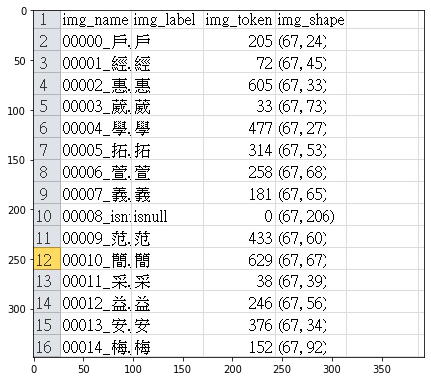

In [61]:
img = Image.open(os.getcwd() +'/image/label_tab01.jpg')
plt.figure(figsize=(7,10))
plt.imshow(img)

In [40]:
# count number of training data with every class
# 計算每個類別的訓練資料數量  ，寫入 basic_token.csv
label_list ,token_list ,ans_list, count_list = [], [], [], []
# title => ['label_name' ,'token_num' ,'return_ans', 'data_count']

df = pd.read_csv(os.getcwd() + '/basic_token.csv', encoding = 'big5')

count_list = [0]*len(df['label_name'])

# get train data label_name && record count
train_data_path = os.getcwd() + '/ImageDataset/training_set'
if not os.path.isdir(train_data_path):
    print('>> folder /training_set not exist, pls check')
else:
    data_list = os.listdir(train_data_path)
    data_list.sort()
    for data in data_list:
        img_name = data.split('.')[0]
        img_label = img_name.split('_')[1]
        
        df_index = df[df['label_name'] == img_label].index.values[0]
        count_list[df_index] += 1
        
    # new dataframe
    df_new = pd.DataFrame({
    'label_name':df['label_name'],
    'token_num' :df['token_num'],
    'return_ans':df['return_ans'], 
    'data_count':count_list
    })
    print(df_new)
    df_new.to_csv(os.getcwd() + '/basic_token_modify.csv', index = False, encoding = 'big5')
    print('\n>> modify .csv file successful!')


    label_name  token_num return_ans  data_count
0       isnull          0     isnull        1518
1            宋          1          宋         100
2            名          2          名          99
3            楊          3          楊          98
4            活          4          活          87
..         ...        ...        ...         ...
796          班        796          班          21
797          集        797          集          39
798          覽        798          覽          26
799          買        799          買          21
800          圖        800          圖          19

[801 rows x 4 columns]

>> modify .csv file successful!


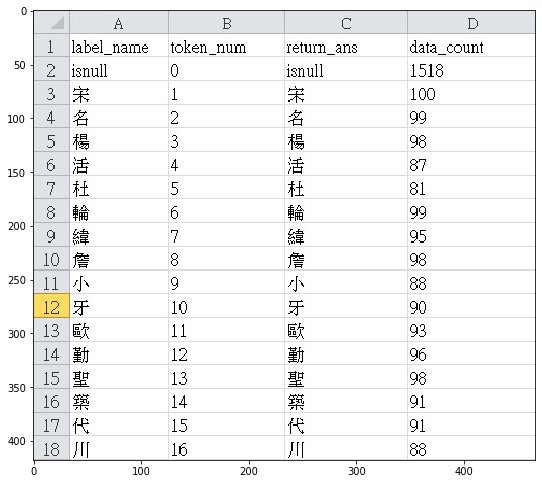

In [64]:
img = Image.open(os.getcwd() +'/image/label_token02.jpg')
plt.figure(figsize=(9,10))
plt.imshow(img)

In [50]:
# get data count avg. but without 'isnull' class
# 找出其數量的平均(排除isnull)的平均 ，並找出低於平均的
df = pd.read_csv(os.getcwd() + '/basic_token_modify.csv', encoding = 'big5')
lst = df['data_count']
total = np.sum(np.array(lst[1:].values))
print('>> total count with \'class\' :', total)
avg = np.mean(np.array(lst[1:].values))
print('>> count avg :', avg)

print(np.array(lst[1:].values))

>> total count with 'class' : 67286
>> count avg : 84.1075
[100  99  98  87  81  99  95  98  88  90  93  96  98  91  91  88  89  97
 101  98  96  92  98 147  88  99  22 138 114  98  70  98  42  87  47  98
 107  95  98  60  99  90 100  92  91  91  88  93 101  93  87  98  95  99
 101  79  66  66  49  94 101  96  97  96  78 240  45  93  93  93  95  92
  96  97  89  96  96  87  95  96  98  95 101  68  94  79  69  95  93  34
  96  98  93  60 103  99  65 100  80  77  96  73  54  94 100  69  91  97
 100  97  99  51 100  98 102 103 119  96  96 111  72  68 132  97  96  99
  58  29  75 100  51  97  95  70  66  86  91  99  26  88  72 103  96  99
 102  94  64 100  96 113  92  96  95 112  93 100 101 103  94 104  97  86
  94  86  95  98  93  93 103  61  77  99  95  48  97  98 110  99 108  98
  95  53  84 102  94  70  39 108  89  77 104  59  97  81  97 128  95  85
  98 100  76  66  40  61 106 108 101  66  97  37  28  99  27  76  97  97
 120  99  64  85  94  98  61  65  63 102  92  55 103  95  95  93 

In [5]:
# 
#
# testing data with competition , day1~day4
#
#
# 建立圖片資訊對照表 # 對照表 title = ['img_name', 'img_label', 'img_token', 'img_shape']
def create_image_tab(token_path, train_data_path, tab_name = 'test_image0617_tab'):
    print('>> == create_token_list ==')
    df_tab = []
    df_token = []
    if os.path.isfile(token_path):
        df_token = pd.read_csv(token_path, encoding='big5') #繁體中文, big5
    else:
        print(' >> '+ csv_path + ' not EXIST ! please check file !')
    img_name_list = []
    img_label_list = []
    img_token_list = []
    img_shape_list = []
    if not os.path.isdir(train_data_path):
        print('>> '+ train_data_path +' NOT Exist ! please check train_data_folder !')
    else:
        print('>> Get train data folder')
        tab_path = os.getcwd() + '/' + tab_name + '.csv'
        if not os.path.isfile(tab_path):
            file_list = os.listdir(train_data_path)
            file_list.sort()
            for img_file in file_list:
                # ex: 00009_范.jpg
                img_name = img_file
                img_name_list.append(img_name)

                # ex: 范
                img_label = (img_file.split('.')[0]).split('_')[1]
                img_label_list.append(img_label)

                # get label token ex:453 pair with token.csv
                if img_label in df_token['label_name'].values.tolist():
                    token = (df_token[(df_token['label_name'] == img_label)])['token_num']
                    img_token_list.append(token.values[0])
                else:
                    print(' == Error for img label not in token list == '+ img_file) # 檢查資料青洗後是否有取名錯誤

                # get shape 
                img = Image.open(train_data_path + '/' + img_file)
                img_shape_list.append(np.array(img).shape[:2])

            # ===== write file
            df_img_tab = pd.DataFrame({'img_name' : img_name_list,
                        'img_label' : img_label_list,
                        'img_token' : img_token_list,
                        'img_shape' : img_shape_list})
            df_img_tab.to_csv(tab_name + '.csv', index = False, encoding = 'big5')
            print('>> create tab successful')
        else:
            print('>> this tab is already exist')
if __name__ == '__main__':
    token_path = os.getcwd() + '/basic_token.csv'
    train_data_path = os.getcwd() + '/ImageDataset/testing_set/test_stage_data_0617'
    create_image_tab(token_path, train_data_path)

>> == create_token_list ==
>> Get train data folder
>> create tab successful
